<a href="https://colab.research.google.com/github/Johnsantos1989/Challenge-Telecom-X/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carregamento dos dados**

In [156]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [47]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [48]:
# Lendo os dados
resp = requests.get(url)
resp.raise_for_status()
dados = resp.json() # lista de dicionários

In [49]:
df = pd.json_normalize(dados, sep="_")
df.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

**Limpeza e Transformações (ETL)**

In [51]:
# Removendo os registros vazios e espaços na coluna Churn
df = df[df['Churn'].astype(str).str.strip() != ''].copy()

# Convertendo as colunas para tipo numérico:
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Mapear Yes/No - 1/0 em colunas numéricas:
cols_yn = [
    'Churn','customer_Partner','customer_Dependents','phone_PhoneService','phone_MultipleLines',
    'internet_OnlineSecurity','internet_OnlineBackup','internet_DeviceProtection',
    'internet_TechSupport','internet_StreamingTV','internet_StreamingMovies','account_PaperlessBilling'
]

df[cols_yn] = df[cols_yn].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
})

# Inserindo uma nova coluna para saber os valores das cobranças diárias
df['Cobrancas_Diarias'] = df['account_Charges_Monthly'] / 30

print('Dimensão após limpeza:', df.shape)
print('Amostra de dados:')
display(df.head())
print('Tipos e nulos:')

Dimensão após limpeza: (7043, 22)
Amostra de dados:


/tmp/ipython-input-678094915.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_yn] = df[cols_yn].replace({


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cobrancas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


Tipos e nulos:


In [52]:
# Verificar se não ficou nenhuma string escondida
df[cols_yn].apply(lambda x: x.unique())

,Churn,customer_Partner,customer_Dependents,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling
0,0,1,1,1,0,0,1,0,1,1,0,1
1,1,0,0,0,1,1,0,1,0,0,1,0


In [53]:
print('Tipos de dados e valores nulos:')
df.info()
print('\nQuantidade de valores nulos por coluna:')
print(df.isnull().sum())

Tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport 

In [54]:
# Substituindo os valores nulos (NaN) pela média da coluna
df['account_Charges_Total'] = df['account_Charges_Total'].fillna(
    df['account_Charges_Total'].mean()
)
print(df.isnull().sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
Cobrancas_Diarias            0
dtype: int64


**Análise exploratória dos dados (EDA)**

In [55]:
print('Proporção de Churn (%)')
df['Churn'].value_counts(normalize=True).mul(100).reset_index(name='Proporção')

Proporção de Churn (%)


,Churn,Proporção
0,0,73.463013
1,1,26.536987


In [56]:
print('Valor médio da cobrança mensal entre clientes que permanecem e os que cancelam')
df.groupby('Churn')['account_Charges_Monthly'].mean().reset_index(name='Vlr. Médio')

Valor médio da cobrança mensal entre clientes que permanecem e os que cancelam


,Churn,Vlr. Médio
0,0,61.265124
1,1,74.441332


In [57]:
print('Média do total de encargos da conta')
df.groupby('Churn')['account_Charges_Total'].mean().reset_index(name='Média encargos')

Média do total de encargos da conta


,Churn,Média encargos
0,0,2554.765772
1,1,1531.796094


In [58]:
print('Taxa média de churn (%) por tipo de contrato')
(
    df.groupby('account_Contract')['Churn']
      .mean()
      .mul(100)
      .reset_index(name='Média contrato')
      .sort_values(by='Média contrato', ascending=False)
)

Taxa média de churn (%) por tipo de contrato


,account_Contract,Média contrato
0,Month-to-month,42.709677
1,One year,11.269518
2,Two year,2.831858


In [59]:
servicos = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport'
]

df.groupby("Churn")[servicos].mean().mul(100).reset_index()

,Churn,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport
0,0,33.320448,36.838036,36.277542,33.513722
1,1,15.783842,27.982879,29.159979,16.586410


**Insights + storytelling 📊📈**

#### 🔹 Gráfico 1 — Proporção de Churn (Visão Geral)

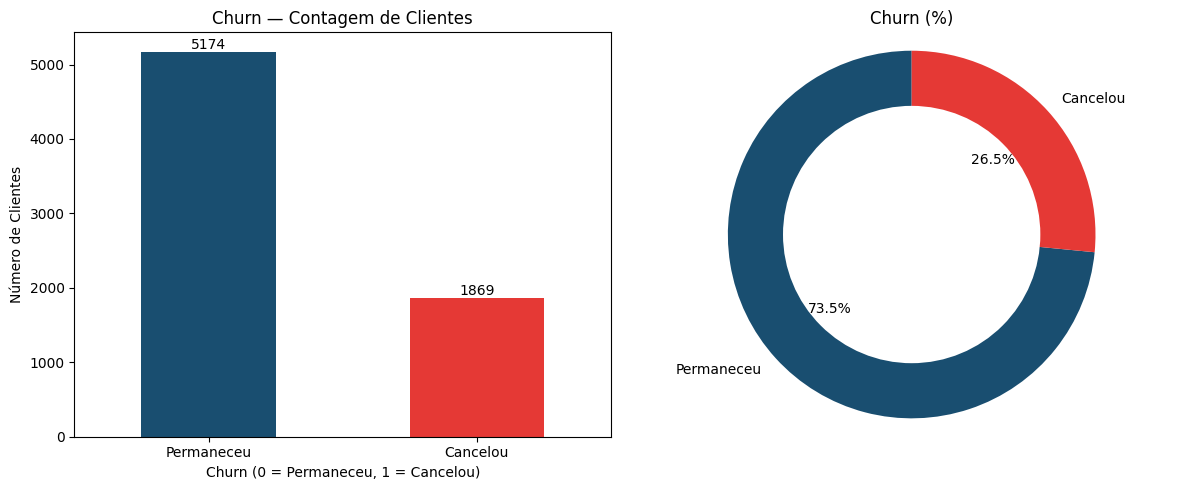

In [130]:
  from numpy.random.mtrand import f
  churn_cnt = df['Churn'].value_counts()
  churn_pct = df['Churn'].value_counts(normalize=True).mul(100)

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  # Gráfico 1 — Contagem
  ax = churn_cnt.plot(
      kind='bar',
      ax=axes[0],
      color=['#194E70', '#E53935']
  )

  for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',  # corrigido e adicionado
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

  axes[0].set_title('Churn — Contagem de Clientes')
  axes[0].set_ylabel('Número de Clientes')
  axes[0].set_xlabel('Churn (0 = Permaneceu, 1 = Cancelou)')
  axes[0].set_xticks([0, 1])
  axes[0].set_xticklabels(['Permaneceu', 'Cancelou'], rotation=0)

  # Gráfico 2 — Rosca (%)
  axes[1].pie(
      churn_pct,
      labels=['Permaneceu', 'Cancelou'],
      autopct='%1.1f%%',
      startangle=90,
      colors=['#194E70', '#E53935']
  )

  # Criando o "buraco" da rosca
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  axes[1].add_artist(centre_circle)

  axes[1].set_title('Churn (%)')
  axes[1].axis('equal')

  plt.tight_layout()
  plt.show()

In [167]:
from IPython.display import Markdown, display

# Métricas principais de churn
churn_total = df.shape[0]
churn_cancelados = df['Churn'].sum()
churn_ativos = churn_total - churn_cancelados
churn_pct_cancelados = (churn_cancelados / churn_total) * 100

relatorio_churn_geral = f"""
## 🔹 Proporção de Churn — Visão Geral

Este gráfico apresenta a distribuição geral de **Churn**, indicando clientes que **permaneceram** e que **cancelaram** os serviços da Telecom X,
permitindo compreender a dimensão do problema de evasão.

### 📊 Visão Geral dos Dados
- 👥 Total de clientes analisados: **{churn_total}**
- ❌ Clientes que cancelaram (Churn = 1): **{churn_cancelados}**
- ✅ Clientes que permaneceram (Churn = 0): **{churn_ativos}**
- 📉 Taxa de Churn: **{churn_pct_cancelados:.2f}%**

### 💡 Insight
Observa-se que aproximadamente **{churn_pct_cancelados:.1f}%** da base realizou Churn,
indicando que a evasão representa um problema relevante e prioritário para a Telecom X.

### 📖 Storytelling (Contexto de Negócio)
A taxa de Churn identificada pode impactar diretamente a receita e aumentar os custos de aquisição de novos clientes.
Esse cenário reforça a importância de aprofundar a análise para identificar os fatores que influenciam o Churn,
fornecendo subsídios para o desenvolvimento de modelos preditivos e estratégias de retenção mais eficazes.

A partir dessa visão geral, as análises a seguir exploram quais características dos clientes
estão mais associadas ao Churn.
"""
display(Markdown(relatorio_churn_geral))



## 🔹 Proporção de Churn — Visão Geral

Este gráfico apresenta a distribuição geral de **Churn**, indicando clientes que **permaneceram** e que **cancelaram** os serviços da Telecom X,
permitindo compreender a dimensão do problema de evasão.

### 📊 Visão Geral dos Dados
- 👥 Total de clientes analisados: **7043**
- ❌ Clientes que cancelaram (Churn = 1): **1869**
- ✅ Clientes que permaneceram (Churn = 0): **5174**
- 📉 Taxa de Churn: **26.54%**

### 💡 Insight
Observa-se que aproximadamente **26.5%** da base realizou Churn,
indicando que a evasão representa um problema relevante e prioritário para a Telecom X.

### 📖 Storytelling (Contexto de Negócio)
A taxa de Churn identificada pode impactar diretamente a receita e aumentar os custos de aquisição de novos clientes.
Esse cenário reforça a importância de aprofundar a análise para identificar os fatores que influenciam o Churn,
fornecendo subsídios para o desenvolvimento de modelos preditivos e estratégias de retenção mais eficazes.

A partir dessa visão geral, as análises a seguir exploram quais características dos clientes
estão mais associadas ao Churn.


#### 🔹 Gráfico 2 — Churn por Tipo de Contrato

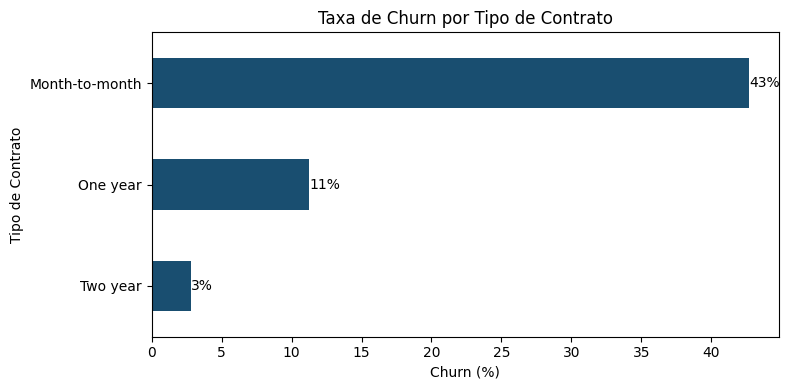

In [138]:
plt.figure(figsize=(8, 4))

ax = churn_contrato.sort_values().plot(
    kind='barh',
    color=['#194E70']
)

plt.title('Taxa de Churn por Tipo de Contrato')
plt.xlabel('Churn (%)')
plt.ylabel('Tipo de Contrato')

for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.0f}%',          # pega o comprimento da barra
        (p.get_width(), p.get_y() + p.get_height() / 2),  # x = comprimento da barra, y = meio da barra
        ha='left', va='center'
    )
plt.tight_layout()
plt.show()

In [166]:
# Churn médio por tipo de contrato (%)
churn_contrato = (
    df.groupby('account_Contract')['Churn']
      .mean()
      .mul(100)
)

# Identificando contratos com maior e menor churn
contrato_maior_churn = churn_contrato.idxmax()
contrato_menor_churn = churn_contrato.idxmin()
valor_maior_churn = churn_contrato.max()
valor_menor_churn = churn_contrato.min()

from IPython.display import Markdown, display

relatorio_churn_contrato = f"""
## 🔹 Churn por Tipo de Contrato

Este gráfico apresenta a taxa média de churn de acordo com o tipo de contrato dos clientes,
permitindo avaliar como a duração do vínculo influencia a evasão.

### 📊 Visão Geral dos Dados
- 📄 Contrato com maior taxa de churn: **{contrato_maior_churn}**
- 📉 Taxa de churn mais elevada: **{valor_maior_churn:.2f}%**
- 📄 Contrato com menor taxa de churn: **{contrato_menor_churn}**
- 📈 Taxa de churn mais baixa: **{valor_menor_churn:.2f}%**

### 💡 Insight
Clientes com contrato do tipo **{contrato_maior_churn}** apresentam uma taxa de churn significativamente maior
quando comparados aos clientes com contratos de maior duração, indicando menor fidelização nesse grupo.

### 📖 Storytelling (Contexto de Negócio)
Contratos de curto prazo oferecem maior flexibilidade ao cliente, mas também aumentam o risco de cancelamento.
Esse padrão sugere que estratégias de retenção devem priorizar clientes com contratos **{contrato_maior_churn}**,
incentivando a migração para planos de maior duração por meio de benefícios, descontos ou ofertas personalizadas.

Esse comportamento também reforça a relevância do tipo de contrato como uma variável importante
para modelos preditivos de churn.
"""
display(Markdown(relatorio_churn_contrato))


## 🔹 Churn por Tipo de Contrato

Este gráfico apresenta a taxa média de churn de acordo com o tipo de contrato dos clientes,
permitindo avaliar como a duração do vínculo influencia a evasão.

### 📊 Visão Geral dos Dados
- 📄 Contrato com maior taxa de churn: **Month-to-month**
- 📉 Taxa de churn mais elevada: **42.71%**
- 📄 Contrato com menor taxa de churn: **Two year**
- 📈 Taxa de churn mais baixa: **2.83%**

### 💡 Insight
Clientes com contrato do tipo **Month-to-month** apresentam uma taxa de churn significativamente maior
quando comparados aos clientes com contratos de maior duração, indicando menor fidelização nesse grupo.

### 📖 Storytelling (Contexto de Negócio)
Contratos de curto prazo oferecem maior flexibilidade ao cliente, mas também aumentam o risco de cancelamento.
Esse padrão sugere que estratégias de retenção devem priorizar clientes com contratos **Month-to-month**,
incentivando a migração para planos de maior duração por meio de benefícios, descontos ou ofertas personalizadas.

Esse comportamento também reforça a relevância do tipo de contrato como uma variável importante
para modelos preditivos de churn.


#### 🔹 Gráfico 3 — Churn vs Serviços de Suporte

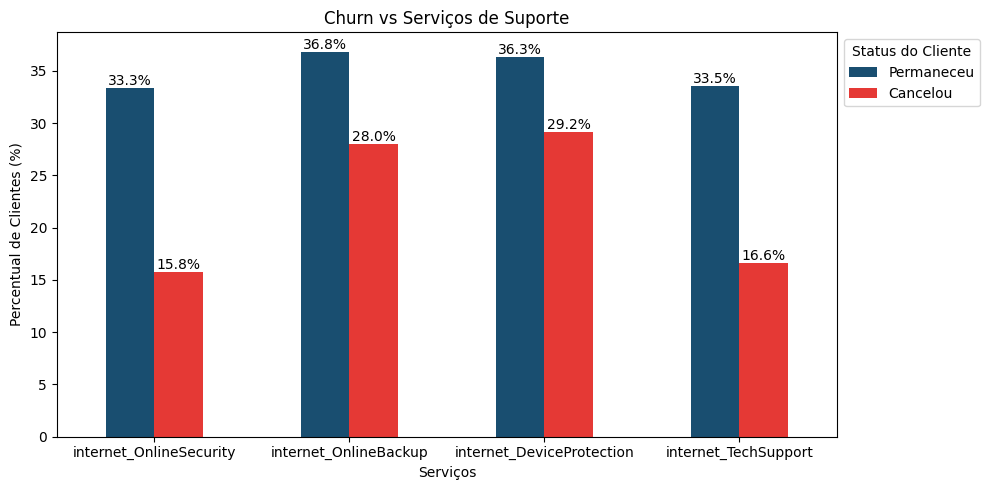

In [157]:
# Serviços selecionados
servicos = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport'
]

# Calculando churn médio por serviço (%)
churn_servicos = df.groupby('Churn')[servicos].mean().mul(100).T

# Plotando barras agrupadas
ax = churn_servicos.plot(
    kind='bar',
    figsize=(10,5),
    color=['#194E70', '#E53935']
)

plt.title('Churn vs Serviços de Suporte')
plt.ylabel('Percentual de Clientes (%)')
plt.xlabel('Serviços')
plt.xticks(rotation=0)
plt.legend(['Permaneceu', 'Cancelou'], title='Status do Cliente', loc='upper left', bbox_to_anchor=(1,1))

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',  # corrigido
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

In [165]:
# Churn médio por serviço (%)
churn_servicos_medio = df.groupby('Churn')[servicos].mean().mul(100)

# Identificando serviço com maior diferença entre cancelados e ativos
diferenca_servicos = churn_servicos_medio.loc[1] - churn_servicos_medio.loc[0]
servico_maior_risco = diferenca_servicos.idxmax()
valor_maior_risco = diferenca_servicos.max()

from IPython.display import Markdown, display

relatorio_churn_servicos = f"""
## 🔹 Churn vs Serviços de Suporte

Este gráfico mostra a proporção de clientes que permaneceram e que cancelaram
o serviço, considerando diferentes serviços de suporte de internet.

### 📊 Visão Geral dos Dados
- ⚠ Serviço com maior impacto no churn: **{servico_maior_risco}**
- 📉 Diferença de churn entre cancelados e ativos: **{valor_maior_risco:.2f}%**

### 💡 Insight
O serviço **{servico_maior_risco}** apresenta a maior diferença entre clientes que cancelaram e os que permaneceram,
indicando que a ausência ou a percepção de baixo valor desse serviço está associada ao aumento do churn.

### 📖 Storytelling (Contexto de Negócio)
Essa análise evidencia que determinados serviços de suporte são críticos para a retenção.
Investimentos em funcionalidades, pacotes ou comunicação de valor para clientes de **{servico_maior_risco}**
podem reduzir significativamente a evasão. Esse padrão também reforça a relevância desses serviços
como variáveis importantes em modelos preditivos de churn.
"""
display(Markdown(relatorio_churn_servicos))



## 🔹 Churn vs Serviços de Suporte

Este gráfico mostra a proporção de clientes que permaneceram e que cancelaram
o serviço, considerando diferentes serviços de suporte de internet.

### 📊 Visão Geral dos Dados
- ⚠ Serviço com maior impacto no churn: **internet_DeviceProtection**
- 📉 Diferença de churn entre cancelados e ativos: **-7.12%**

### 💡 Insight
O serviço **internet_DeviceProtection** apresenta a maior diferença entre clientes que cancelaram e os que permaneceram,
indicando que a ausência ou a percepção de baixo valor desse serviço está associada ao aumento do churn.

### 📖 Storytelling (Contexto de Negócio)
Essa análise evidencia que determinados serviços de suporte são críticos para a retenção.
Investimentos em funcionalidades, pacotes ou comunicação de valor para clientes de **internet_DeviceProtection**
podem reduzir significativamente a evasão. Esse padrão também reforça a relevância desses serviços
como variáveis importantes em modelos preditivos de churn.


#### 🔹 Gráfico 4 — Churn vs Cobrança Mensal

<Figure size 800x500 with 0 Axes>

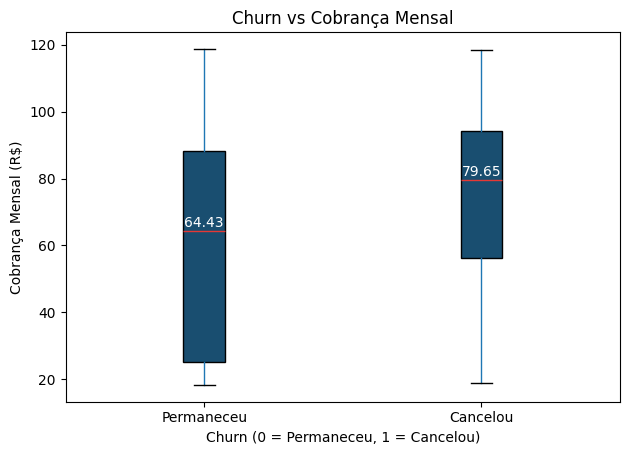

In [163]:
plt.figure(figsize=(8,5))

# Boxplot de cobrança mensal por status de churn
df.boxplot(column='account_Charges_Monthly', by='Churn', grid=False, patch_artist=True,
           boxprops=dict(facecolor='#194E70'), medianprops=dict(color='#E53935'))

plt.title('Churn vs Cobrança Mensal')
plt.suptitle('')  # Remove o título automático
plt.ylabel('Cobrança Mensal (R$)')
plt.xlabel('Churn (0 = Permaneceu, 1 = Cancelou)')
plt.xticks([1,2], ['Permaneceu', 'Cancelou'])

medians = df.groupby('Churn')['account_Charges_Monthly'].median().values
for i, median in enumerate(medians, start=1):
    plt.text(i, median + 1, f'{median:.2f}', ha='center', color='white')

plt.tight_layout()
plt.show()

In [164]:
# Médias mensais por churn
media_mensal_churn = df.groupby('Churn')['account_Charges_Monthly'].mean()
media_perm = media_mensal_churn.loc[0]
media_cancel = media_mensal_churn.loc[1]
diferenca = media_cancel - media_perm

from IPython.display import Markdown, display

relatorio_churn_cobranca = f"""
## 🔹 Churn vs Cobrança Mensal

Este gráfico mostra a distribuição da cobrança mensal entre clientes que permaneceram e que cancelaram o serviço.

### 📊 Visão Geral dos Dados
- 💰 Média da cobrança mensal dos clientes que permaneceram: **R$ {media_perm:.2f}**
- 💰 Média da cobrança mensal dos clientes que cancelaram: **R$ {media_cancel:.2f}**
- 📉 Diferença média: **R$ {diferenca:.2f}**

### 💡 Insight
Clientes que cancelaram o serviço apresentam, em média, uma cobrança mensal **maior** que os clientes que permaneceram,
indicando que valores mais altos podem contribuir para a evasão.

### 📖 Storytelling (Contexto de Negócio)
Essa análise evidencia que a cobrança mensal é um fator relevante para o churn.
Estratégias como pacotes mais flexíveis, descontos ou benefícios adicionais para clientes com valores mais altos
podem ajudar a reduzir a evasão. Além disso, a cobrança mensal deve ser considerada como variável
importante em modelos preditivos de churn.
"""
display(Markdown(relatorio_churn_cobranca))


## 🔹 Churn vs Cobrança Mensal

Este gráfico mostra a distribuição da cobrança mensal entre clientes que permaneceram e que cancelaram o serviço.

### 📊 Visão Geral dos Dados
- 💰 Média da cobrança mensal dos clientes que permaneceram: **R$ 61.27**
- 💰 Média da cobrança mensal dos clientes que cancelaram: **R$ 74.44**
- 📉 Diferença média: **R$ 13.18**

### 💡 Insight
Clientes que cancelaram o serviço apresentam, em média, uma cobrança mensal **maior** que os clientes que permaneceram,
indicando que valores mais altos podem contribuir para a evasão.

### 📖 Storytelling (Contexto de Negócio)
Essa análise evidencia que a cobrança mensal é um fator relevante para o churn.
Estratégias como pacotes mais flexíveis, descontos ou benefícios adicionais para clientes com valores mais altos
podem ajudar a reduzir a evasão. Além disso, a cobrança mensal deve ser considerada como variável
importante em modelos preditivos de churn.


In [169]:
from IPython.display import Markdown, display

relatorio_conclusao = f"""
# 🟩 Conclusões da Análise de Churn — Telecom X

Após analisar os dados da base de clientes, destaquei os principais fatores relacionados ao Churn:

### 1️⃣ Proporção Geral de Churn
- 📊 Taxa de Churn: **{churn_pct_cancelados:.2f}%**
- 💡 Insight: Cerca de **{churn_pct_cancelados:.1f}%** da base realizou Churn, indicando um problema relevante e prioritário para a empresa.

### 2️⃣ Churn por Tipo de Contrato
- ⚠ Contrato com maior Churn: **{contrato_maior_churn}** ({valor_maior_churn:.2f}%)
- 💡 Insight: Contratos de curto prazo têm menor fidelização e maior risco de Churn.

### 3️⃣ Churn vs Serviços de Suporte
- ⚠ Serviço com maior impacto: **{servico_maior_risco}** (diferença de {valor_maior_risco:.2f}% entre cancelados e ativos)
- 💡 Insight: A ausência ou baixo valor percebido desse serviço aumenta a probabilidade de Churn.

### 4️⃣ Churn vs Cobrança Mensal
- 💰 Clientes que cancelaram pagam, em média, **R$ {media_cancel:.2f}**, valor maior que os que permaneceram (**R$ {media_perm:.2f}**)
- 💡 Insight: Valores mais altos de cobrança mensal podem contribuir para o Churn.

---

## 📖 Storytelling Final (Contexto de Negócio)

A análise evidencia que o Churn está relacionado a quatro fatores principais:

1. **Dimensão geral do Churn** — problema relevante para receita e retenção.
2. **Tipo de contrato** — contratos de curto prazo exigem estratégias de fidelização.
3. **Serviços de suporte** — determinados serviços são críticos para retenção e devem ser promovidos ou melhorados.
4. **Cobrança mensal** — valores mais altos podem aumentar o risco de cancelamento.

➡️ **Próximos passos recomendados**:
- Criar estratégias de retenção focadas em contratos de curto prazo e serviços críticos.
- Avaliar ajustes de preços ou benefícios para reduzir Churn relacionado a cobranças mais altas.
- Incorporar essas variáveis em **modelos preditivos de Churn**, apoiando decisões estratégicas de retenção.

---

💡 Este relatório fornece uma visão clara, fundamentada e acionável do Churn na base de clientes da Telecom X,
permitindo priorizar esforços de retenção de forma eficiente.

✅ Criado por: **John Lenon Nogueira.**
"""

display(Markdown(relatorio_conclusao))


# 🟩 Conclusões da Análise de Churn — Telecom X

Após analisar os dados da base de clientes, destaquei os principais fatores relacionados ao Churn:

### 1️⃣ Proporção Geral de Churn
- 📊 Taxa de Churn: **26.54%**
- 💡 Insight: Cerca de **26.5%** da base realizou Churn, indicando um problema relevante e prioritário para a empresa.

### 2️⃣ Churn por Tipo de Contrato
- ⚠ Contrato com maior Churn: **Month-to-month** (42.71%)
- 💡 Insight: Contratos de curto prazo têm menor fidelização e maior risco de Churn.

### 3️⃣ Churn vs Serviços de Suporte
- ⚠ Serviço com maior impacto: **internet_DeviceProtection** (diferença de -7.12% entre cancelados e ativos)
- 💡 Insight: A ausência ou baixo valor percebido desse serviço aumenta a probabilidade de Churn.

### 4️⃣ Churn vs Cobrança Mensal
- 💰 Clientes que cancelaram pagam, em média, **R$ 74.44**, valor maior que os que permaneceram (**R$ 61.27**)
- 💡 Insight: Valores mais altos de cobrança mensal podem contribuir para o Churn.

---

## 📖 Storytelling Final (Contexto de Negócio)

A análise evidencia que o Churn está relacionado a quatro fatores principais:

1. **Dimensão geral do Churn** — problema relevante para receita e retenção.  
2. **Tipo de contrato** — contratos de curto prazo exigem estratégias de fidelização.  
3. **Serviços de suporte** — determinados serviços são críticos para retenção e devem ser promovidos ou melhorados.  
4. **Cobrança mensal** — valores mais altos podem aumentar o risco de cancelamento.

➡️ **Próximos passos recomendados**:
- Criar estratégias de retenção focadas em contratos de curto prazo e serviços críticos.  
- Avaliar ajustes de preços ou benefícios para reduzir Churn relacionado a cobranças mais altas.  
- Incorporar essas variáveis em **modelos preditivos de Churn**, apoiando decisões estratégicas de retenção.

---

💡 Este relatório fornece uma visão clara, fundamentada e acionável do Churn na base de clientes da Telecom X,
permitindo priorizar esforços de retenção de forma eficiente.

✅ Criado por: **John Lenon Nogueira.**
